In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

import warnings

$\textbf{Formula di quadratura adattiva per il metodo dei trapezi}$

Si consideri il problema di integrare $ f(x) $ nell'intervallo $[a,b]$ mediante quadratura numerica, dove $f$ è una funzione sufficientemente regolare in $[a,b]$. Una scelta equispaziata dei nodi, in presenza di regioni in cui si hanno forti "variazioni", lascia aperti due problemi principali: 

$\bullet$ non permette di catturare il comportamente della funzione, nel caso in cui non siano abbastanza densi

$\bullet$ si potrebbe al contrario essere obbligati a scegliere molti nodi per ottenere un'approssimzione accurata. Ciò diventa impraticabile dal punto di vista computazionale non appena l'intervallo diventa sufficientemente largo.

Da quanto scritto sopra, l'esigenza di $\textbf{adattare}$ il passo di integrazione

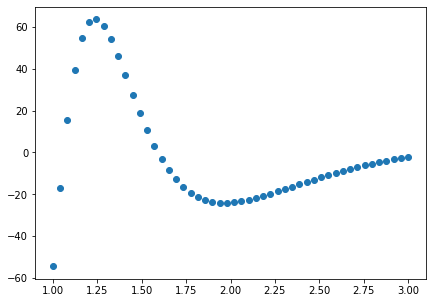

In [2]:
def f(x):
    return  100/(x**2) * np.sin (10/x)

x = np.linspace(1,3,50)
plt.figure(figsize=(7,5))
plt.plot(x,f(x),'o')

Una funzione come quella sopra, non ha ragione di richiedere un numero di nodi uguale nei due intervalli $[1,\frac{3}{2}]$ e $[2,3]$. Meglio quindi trovare una strategia tale da permettere al nostro integratore di $\textbf{adattare}$ il passo a seconda della regione. Poiché una tale routine NON può e non deve dipendere dalla particolare forma di $f$, è necessario utilizzare stime a priori fornite dalla teoria per poter ottenere stime a posteriori

$\bullet$ $\textbf{Stime a posteriori}$


Consideriamo un sottointervallo $[a',b'] \subset [a,b]$.

La formula del trapezio $\int_{a'}^{b'} f(x) dx \approx \frac{b'-a'}{2} (f(a')+f(b')) = I_2$ ha un'errore di quadratura pari a $E_2 = -\frac{h^2}{12} f''(c)$, per un $c \in (a',b')$


Utilizzando la formula del trapezio composita con $n$ intervalli $I_n$, abbiamo invece che $E_n = -\frac{h^3}{12 \cdot n^2} f''(\bar{c}) $, $\bar{c} \in (a',b')$

Fissiamo $n=4$, e supponiamo che la funzione nell'intervallo $[a',b']$ sia tale che $f''(c) = f''(\bar{c})$ 

Allora si ha $E_2 = 16 E_4$.

Quindi, usando le relazioni appena trovate e le seguenti note identità:

\begin{cases}
\int_a^b f dx = I_2 + E_2 \\
\int_a^b f dx = I_4 + E_4
\end{cases}

si trova tramite sostituzione $\text{Err}(a',b') \approx \frac{I_4 - I_2}{16}$

$\bullet$ Perciò, per garantire una buona approssimazione, si richiede in ogni sottointervallo $[a',b']$: $$\frac{\text{Err}}{10} \leq Tol \cdot \frac{b'-a'}{b-a}$$

$\bullet$ $\textbf{Implementazione}$

Nella seguente funzione, si inizia considerando l'intero intervallo $[a,b]$. Ogni volta che il test sull'errore locale non è superato, si dimezza l'intervallo e si procede ad una nuova stima dell'errore. Altrimenti, si incrementa il valore dell'integrale e si aggiornano gli estremi

In [3]:
def trapz_adattiva(fun,a,b,tol,hmin):
    I = 0 
    S = [] #punti adattati
    alpha = a
    beta = b
    
    while (alpha != beta):
        H = (beta-alpha)/2
        if H<hmin:
            warnings.warn("Passo di integrazione troppo piccolo")
            break
        x = np.arange(alpha,beta+H/2,H/2)
        y = fun(x)
        I2 = H*(y[0] + y[4])
        I4 = (H/2) * (0.5*y[0] + y[1] + y[2] + y[3] + 0.5*y[4])
        err = abs(I4 - I2)
        if (err/10 < tol * (beta - alpha)/(b-a) ):
            I+=I4
            alpha = beta
            beta = b
            x.tolist()
            S=np.append(S,x) #aggiorno i punti nella lista
        else:
            beta = (alpha + beta)/2
            

    return np.array([S,I])


In [4]:
a = 1
b = 3
tol = 1e-2
hmin = 1e-5

[S,I] = trapz_adattiva(f,a,b,tol,hmin)

Adapted: -1.4260121421367582 
 Exact:  -1.426024756346262


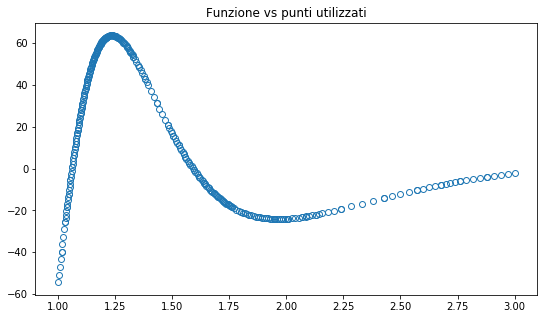

In [5]:
plt.figure(figsize=(9,5))
plt.title('Funzione vs punti utilizzati')
plt.plot(S, f(S),'o',markerfacecolor='None')
print('Adapted:',I,'\n Exact: ', integrate.quad(f,a,b)[0])

Come si può notare nel plot sopra, i punti sono automaticamente addensati nella regione in cui la funzione presenta le variazioni più grandi, in particolare all'inizio, dove la derivata dell'interanda risulta massima. 

Un ulteriore esempio può essere fatto calcolando l'integrale di $f(x)= \arctan(10x)$ in $[-3,4]$

Adapted: 1.5420286696682166 
 Exact:  1.5420362171845392


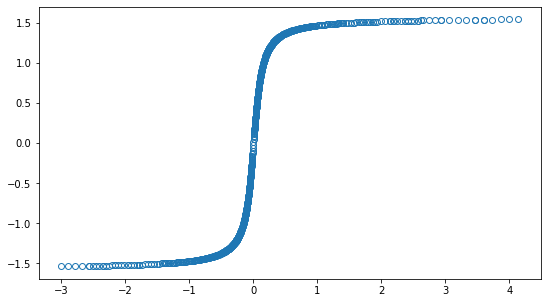

In [6]:
def g(x):
    return np.arctan(10*x)


[S2,I2] = trapz_adattiva(g,-3,4,1e-4,1e-3)

plt.figure(figsize=(9,5))
plt.plot(S2,g(S2),'o',markerfacecolor='None')
print('Adapted:',I2,'\n Exact: ', integrate.quad(g,-3,4)[0])